Pravi program


C:\Users\Djole\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │      10,564,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,564,000 (40.30 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 10,564,000 (40.30 MB)

None
Epoch 1/150
875/875 - 102s - 116ms/step - accuracy: 0.4949 - loss: 0.6939 - val_accuracy: 0.4936 - val_loss: 0.6925
Epoch 2/150
875/875 - 97s - 111ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.5166 - val_loss: 0.6923
Epoch 3/150
875/875 - 100s - 114ms/step - accuracy: 0.5044 - loss: 0.6927 - val_accuracy: 0.5166 - val_loss: 0.6922
Epoch 4/150
875/875 - 100s - 114ms/step - accuracy: 0.5060 - loss: 0.6924 - val_accuracy: 0.5176 - val_loss: 0.6919
Epoch 5/150
875/875 - 99s - 113ms/step - accuracy: 0.5090 - loss: 0.6919 - val_accuracy: 0.5200 - val_loss: 0.6915
Epoch 6/150
875/875 - 97s - 111ms/step - accuracy: 0.5104 - loss: 0.6906 - val_accuracy: 0.5236 - val_loss: 0.6906
Epoch 7/150
875/875 - 99s - 113ms/step - accuracy: 0.5162 - loss: 0.6879 - val_accuracy: 0.5247 - val_loss: 0.6997
Epoch 8/150
875/875 - 99s - 113ms/step - accuracy: 0.5222 - loss: 0.6868 - val_accuracy: 0.5349 - val_loss: 0.6846
Epoch 9/150
875/875 - 98s - 112ms/step - accuracy: 0.5252 - loss: 0.6844

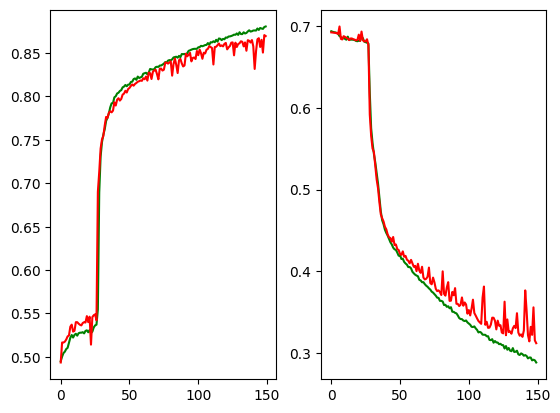

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.src.utils import pad_sequences
from sklearn import model_selection,metrics
import matplotlib.pyplot as plt

print("Pravi program")
data=pd.read_csv("C:/Users/Djole/Desktop/IMDB Dataset.csv")
x=data.iloc[:,0]
y=data.iloc[:,1]
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,stratify=y,test_size=0.3,random_state=2)
y_train = y_train.map({"positive": 1, "negative": 0})
y_test = y_test.map({"positive": 1, "negative": 0})
tokenizer=tf.keras.preprocessing.text.Tokenizer(lower=True,oov_token="<UNK>")
tokenizer.fit_on_texts(x_train.values)
x_train_tokenizovano=tokenizer.texts_to_sequences(x_train)
x_test_tokenizovano=tokenizer.texts_to_sequences(x_test)
x_train_pad=tf.keras.preprocessing.sequence.pad_sequences(x_train_tokenizovano,maxlen=500,padding='post',truncating='post')
x_test_pad=tf.keras.preprocessing.sequence.pad_sequences(x_test_tokenizovano,maxlen=500,padding='post',truncating='post')


vokabular=tokenizer.word_index
vokabular_size=len(tokenizer.word_index)

embedding_dim_glove=100 
glove={}
with open("C:/Users/Djole/Desktop/glove.6B.100d.txt",encoding="utf-8") as f:
    for linija in f:
        red=linija.split()
        rec= red[0]
        niz=np.asarray(red[1:],dtype="float32")
        glove[rec]=niz

embedding_recnik_moj=np.zeros((vokabular_size+2,embedding_dim_glove))

embedding_recnik_moj[0]=np.zeros(100) #
embedding_recnik_moj[1]=np.random.uniform(-0.5,0.5,100)

for rec,i in vokabular.items():
    vektor_iz_glove_za_odredjenu_rec=glove.get(rec)
    if vektor_iz_glove_za_odredjenu_rec is not None:
        embedding_recnik_moj[i]=vektor_iz_glove_za_odredjenu_rec  
    else:
        embedding_recnik_moj[i] = embedding_recnik_moj[1]

model=tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=vokabular_size+2,
        output_dim=100, 
        input_length=len(x_train_pad[0]),
        trainable=False,
        weights=[embedding_recnik_moj]
    ),
    tf.keras.layers.LSTM(units=128),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
print(model.summary())
model.compile(tf.keras.optimizers.Adam(learning_rate=0.00001),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

br_epoha=150
history=model.fit(x_train_pad,y_train,epochs=br_epoha,verbose=2,batch_size=32,validation_split=0.2)

plt.subplot(121)
plt.plot(range(0,br_epoha),history.history['accuracy'],label="acc",color="green")
plt.plot(range(0,br_epoha),history.history['val_accuracy'],label="val_acc",color="red")

plt.subplot(122)
plt.plot(range(0,br_epoha),history.history['loss'],label="loss",color="green")
plt.plot(range(0,br_epoha),history.history['val_loss'],label="val_loss",color="red")
plt.show()
model.save("C:/Users/Djole/Desktop/LSTM_MODEL.h5")


In [5]:
y_pred=model.predict(x_test_pad)


469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step
<class 'numpy.ndarray'>


In [7]:
y_pred=np.where(y_pred>0.5,1,0)

In [8]:
y_pred[0:4]

array([[1],
       [0],
       [0],
       [1]])

In [10]:
rez=metrics.f1_score(y_test,y_pred)
rez

0.8675242010343456

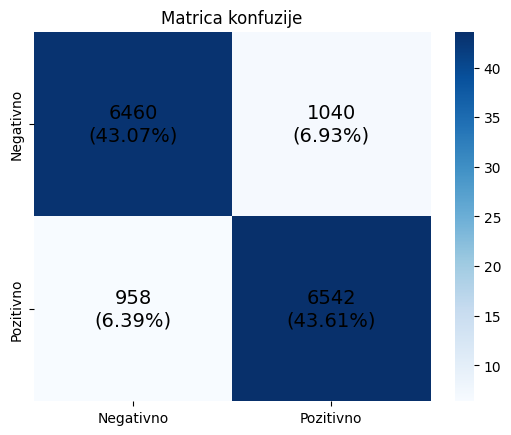

In [28]:
import seaborn
mc=metrics.confusion_matrix(y_test,y_pred)
mc_procenat = mc.astype('float') / mc.sum() * 100

seaborn.heatmap(mc_procenat,cmap="Blues",xticklabels=['Negativno','Pozitivno'],yticklabels=["Negativno", "Pozitivno"])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.5, f"{mc[i, j]}\n({mc_procenat[i, j]:.2f}%)",
                 ha='center', va='center', color="black", fontsize=14)

plt.title("Matrica konfuzije")
plt.show()